<a href="https://colab.research.google.com/github/vislupus/machine-learning/blob/master/World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print(f'Tensorflow version: {tf.__version__}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Tensorflow version: 2.2.0


In [ ]:
happines_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/whr_all.csv', parse_dates=True, encoding = "cp1252")
happines_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
X = happines_data[['GDP per capita',
                   'Social support', 
                   'Healthy life expectancy',
                   'Freedom to make life choices',
                   'Generosity',
                   'Perceptions of corruption']]

y = happines_data['Score']

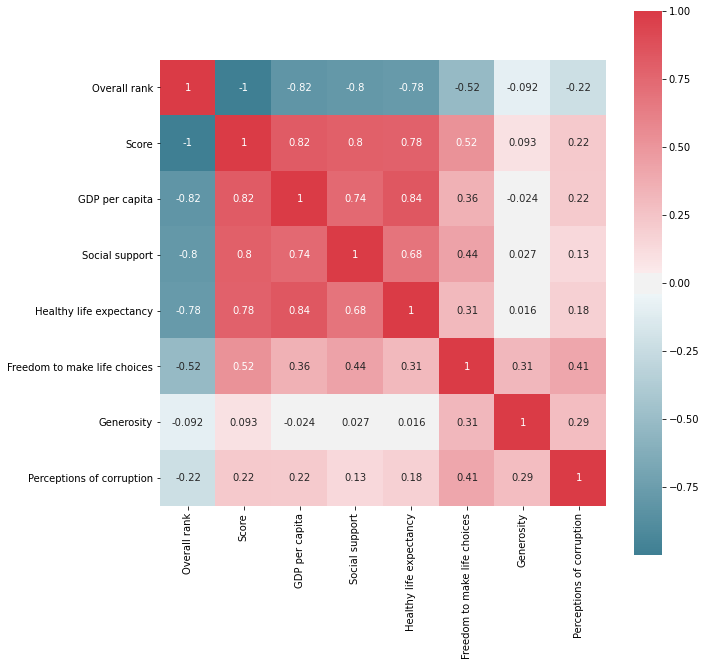

In [ ]:
# corr = happines_data.corr(method = "pearson")
corr = happines_data.corr(method = "spearman")
# corr = happines_data.corr(method = "kendall")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=12, input_shape=(X_train.shape[1],), activation='relu'),
  tf.keras.layers.Dense(units=52, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=120, activation='exponential'),
  tf.keras.layers.Dense(units=34, activation='relu'),
  tf.keras.layers.Dense(units=14, activation='relu'),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                84        
_________________________________________________________________
dense_1 (Dense)              (None, 52)                676       
_________________________________________________________________
dropout (Dropout)            (None, 52)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               6360      
_________________________________________________________________
dense_3 (Dense)              (None, 34)                4114      
_________________________________________________________________
dense_4 (Dense)              (None, 14)                490       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

reg = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=15, callbacks=[callback])

Epoch 1/15
8/8 [==============================] - 0s 36ms/step - loss: 10.3634 - mae: 3.0248 - mse: 10.3634 - val_loss: 5.1206 - val_mae: 2.0728 - val_mse: 5.1206
Epoch 2/15
8/8 [==============================] - 0s 11ms/step - loss: 2.1053 - mae: 1.1537 - mse: 2.1053 - val_loss: 0.6234 - val_mae: 0.6462 - val_mse: 0.6234
Epoch 3/15
8/8 [==============================] - 0s 11ms/step - loss: 1.3301 - mae: 0.9704 - mse: 1.3301 - val_loss: 1.1455 - val_mae: 0.9153 - val_mse: 1.1455
Epoch 4/15
8/8 [==============================] - 0s 10ms/step - loss: 1.0198 - mae: 0.8385 - mse: 1.0198 - val_loss: 0.6313 - val_mae: 0.6205 - val_mse: 0.6313
Epoch 5/15
8/8 [==============================] - 0s 10ms/step - loss: 0.7583 - mae: 0.7066 - mse: 0.7583 - val_loss: 0.8644 - val_mae: 0.7342 - val_mse: 0.8644
Epoch 6/15
8/8 [==============================] - 0s 10ms/step - loss: 0.7608 - mae: 0.7020 - mse: 0.7608 - val_loss: 0.6103 - val_mae: 0.6102 - val_mse: 0.6103
Epoch 7/15
8/8 [================

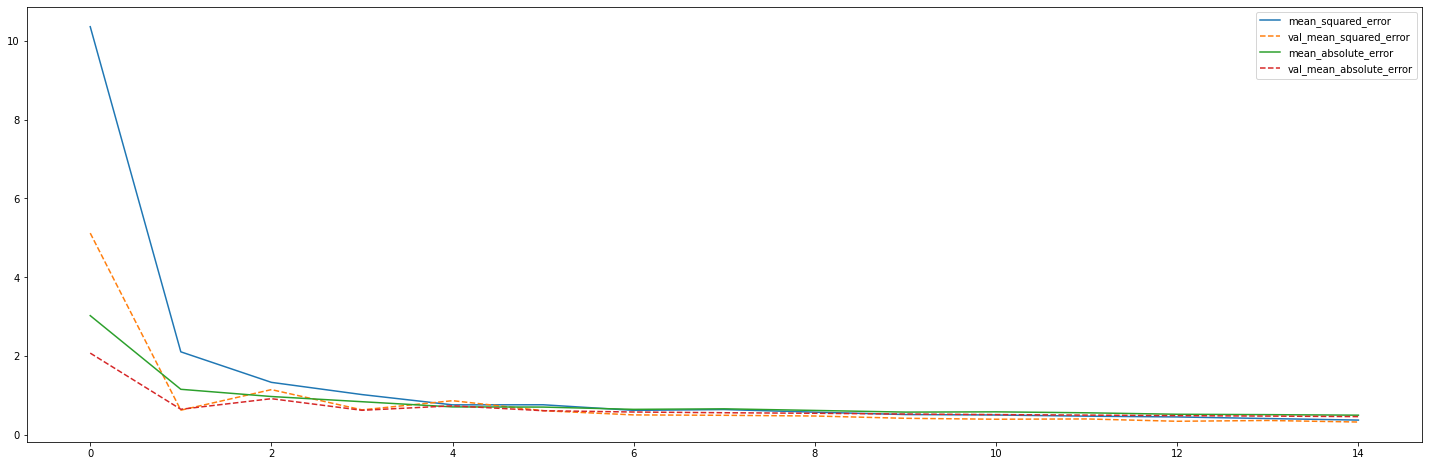

In [ ]:
fig, ax = plt.subplots(figsize=(25,8)) 

plt.plot(reg.history['mse'], label='mean_squared_error')
plt.plot(reg.history['val_mse'], label='val_mean_squared_error', linestyle='--')
plt.plot(reg.history['mae'], label='mean_absolute_error')
plt.plot(reg.history['val_mae'], label='val_mean_absolute_error', linestyle='--')
plt.legend()

In [ ]:
correct=[]

for i in range(len(X)):
    a=happines_data.loc[i,"Score"]
    b=model.predict([[happines_data.loc[i,"GDP per capita"],
                      happines_data.loc[i,"Social support"],
                      happines_data.loc[i,"Healthy life expectancy"],
                      happines_data.loc[i,"Freedom to make life choices"],
                      happines_data.loc[i,"Generosity"],
                      happines_data.loc[i,"Perceptions of corruption"]]])[0]

    correct.append((abs(a-b)/a)[0])
    # print(f'{a:.4f} - {b[0]:.4f} - {(abs(a-b)/a)[0]:.4f}')

print(1-sum(correct) / len(correct))

0.911816517574269
